In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

df = pd.read_csv("hf://datasets/lukebarousse/data_jobs/data_jobs.csv")

#Data_Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

c:\Users\Utilisateur\anaconda3\envs\python_again_vs_code\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
1+1


2

In [3]:
#These two codes do the same thing, return the "size" or count for job_title_short

df.pivot_table(index = 'job_title_short', aggfunc='size')
df.groupby('job_title_short').size()

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [10]:
#This code allows to perform a calculation on grouped values

df.pivot_table(values = 'salary_year_avg', columns = 'job_title_short' ,index = 'job_country', aggfunc='median')



#Breakdown of the code by C
#df.pivot_table(
#    values='salary_year_avg',     # the numeric column to aggregate
#    index='job_title_short',      # becomes the row index
#    columns='job_country',        # becomes the column headers
#    aggfunc='median'              # how to aggregate duplicates)

# Think of it as: “for every job title × country, show the median yearly salary”.


job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


In [7]:
#returning top 6 countries per job postings

top_countries = df['job_country'].value_counts().head(6).index
top_countries

Index(['United States', 'India', 'United Kingdom', 'France', 'Germany',
       'Spain'],
      dtype='object', name='job_country')

<function matplotlib.pyplot.show(close=None, block=None)>

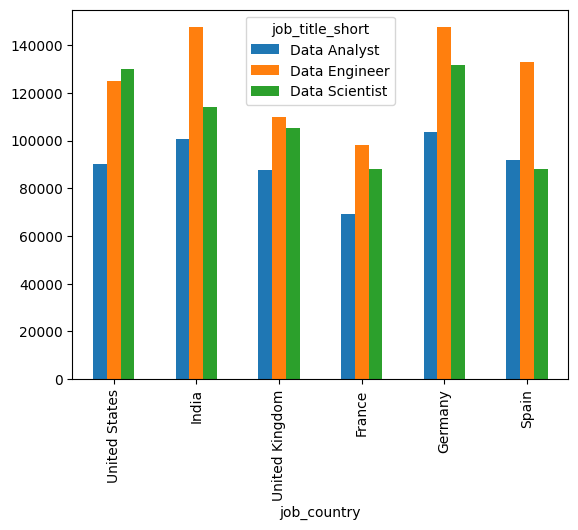

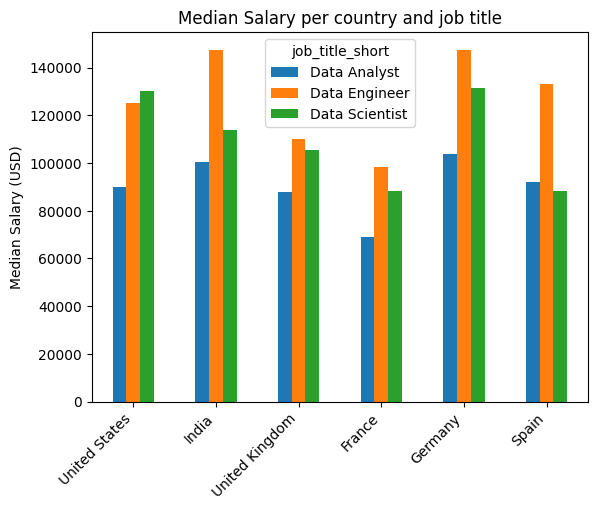

In [13]:
#Now I am going to plot the pivot table but for top 6 countries
#That was an interesting one, quite confusing too

df_job_country_salary = df.pivot_table(values = 'salary_year_avg', columns = 'job_title_short' ,index = 'job_country', aggfunc='median')

df_job_country_salary = df_job_country_salary.loc[top_countries]

job_titles = ['Data Analyst','Data Engineer', 'Data Scientist']

df_job_country_salary = df_job_country_salary[job_titles]

df_job_country_salary.plot(kind ='bar')

#Making the plot more readable
df_job_country_salary.plot(kind='bar')
plt.ylabel('Median Salary (USD)')
plt.xlabel('')
plt.title('Median Salary per country and job title')
plt.xticks(rotation=45, ha='right')
plt.show


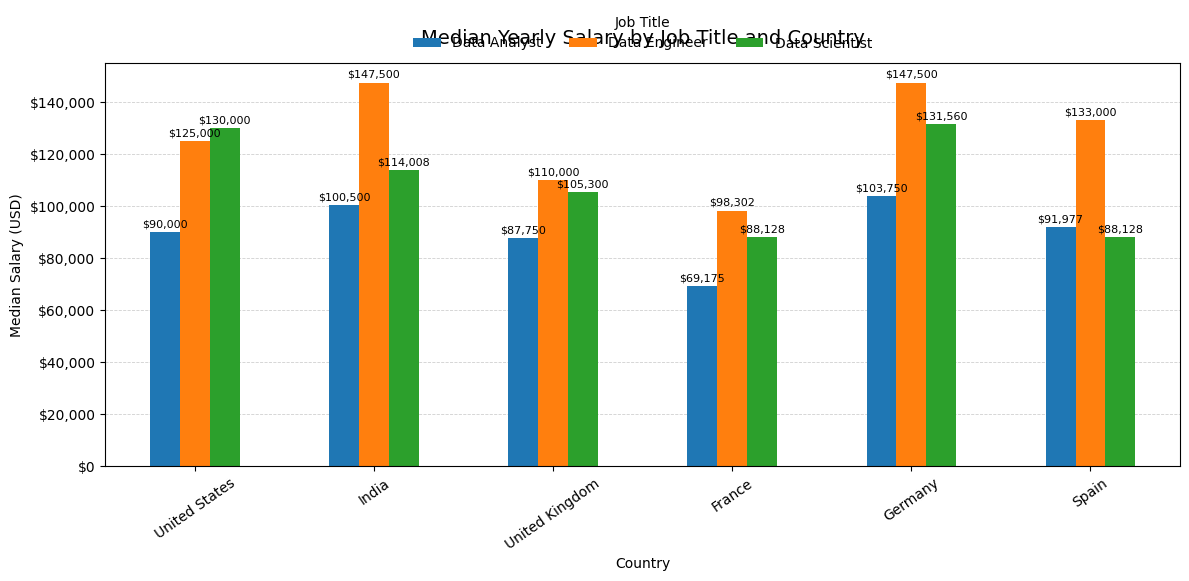

In [ ]:
#C suggested this code to make the plot "prettier"

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter



ax = df_job_country_salary.plot(kind="bar", figsize=(12, 6))

# titles & labels
ax.set_title("Median Yearly Salary by Job Title and Country", pad=14, fontsize=14)
ax.set_xlabel("Country")
ax.set_ylabel("Median Salary (USD)")

# legend styling
ax.legend(title="Job Title", ncol=len(df_job_country_salary.columns), frameon=False,
          bbox_to_anchor=(0.5, 1.15), loc="upper center")

# nicer ticks & grid
ax.tick_params(axis="x", rotation=35)
ax.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.6)
ax.set_axisbelow(True)

# currency formatting
ax.yaxis.set_major_formatter(StrMethodFormatter("${x:,.0f}"))

# value labels on bars (small font, skip NaNs)
for container in ax.containers:
    ax.bar_label(container, fmt="${:,.0f}", padding=2, fontsize=8, labels=[
        (None if (v is None or v != v) else f"${v:,.0f}")  # None for NaN
        for v in container.datavalues
    ])

plt.tight_layout()
plt.show()

#Does not look necessarilly better, overlapping


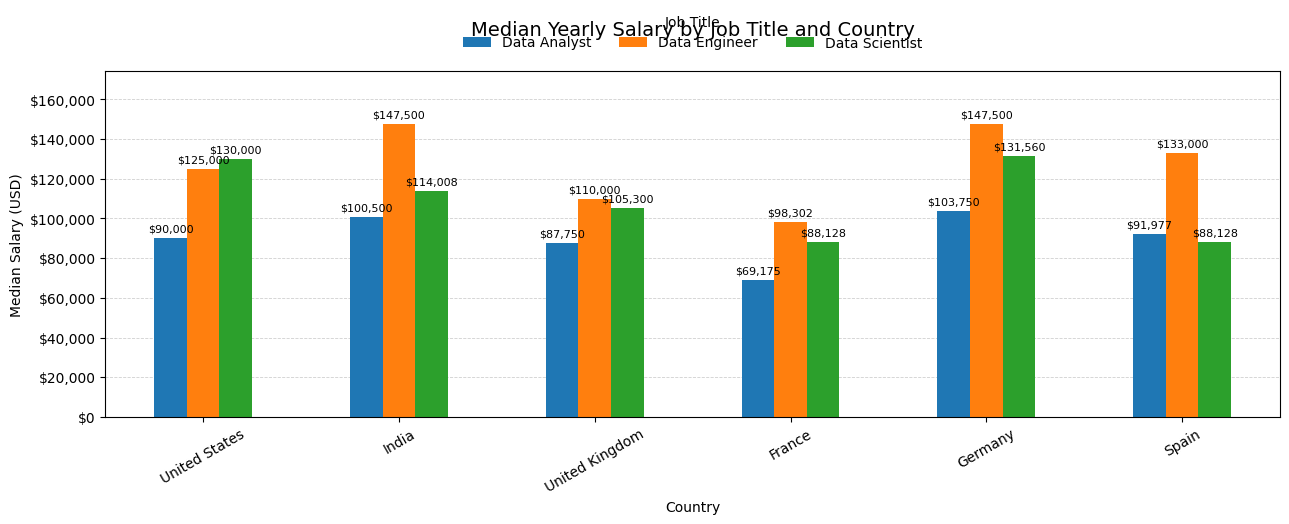

In [ ]:
#I asked C to correct the code
#Does not look any better...


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter


fig, ax = plt.subplots(figsize=(13, 6))
df_job_country_salary.plot(kind="bar", ax=ax)

# Title & axes labels
ax.set_title("Median Yearly Salary by Job Title and Country", fontsize=14, pad=26)
ax.set_xlabel("Country")
ax.set_ylabel("Median Salary (USD)")

# Put legend OUTSIDE (top center), so it won't collide with the title
ax.legend(title="Job Title",
          ncol=len(df_job_country_salary.columns),
          bbox_to_anchor=(0.5, 1.20),  # outside, above the axes
          loc="upper center",
          frameon=False)

# Ticks, grid, and currency formatting
ax.tick_params(axis="x", rotation=30)
ax.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.6)
ax.set_axisbelow(True)
ax.yaxis.set_major_formatter(StrMethodFormatter("${x:,.0f}"))

# Add headroom so value labels don't hit the top
ymax = np.nanmax(df_job_country_salary.to_numpy().astype(float))
ax.set_ylim(0, ymax * 1.18)

# Value labels on bars (skip NaNs)
for bars in ax.containers:
    labels = [f"${v:,.0f}" if np.isfinite(v) else "" for v in bars.datavalues]
    ax.bar_label(bars, labels=labels, padding=3, fontsize=8, clip_on=False)

# Make room for the outside legend
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()
